In [20]:
import os
import docx
import datetime
from num2words import num2words
from dateutil.relativedelta import relativedelta
import pandas as pd
import openpyxl as opxl
import numpy as np
import matplotlib.pyplot as plt
from docx2pdf import convert

#os.chdir("files/")
doc = docx.Document('files/Template.docx')


def comma_separate(a):
    a = str(a)
    i = -1
    b = ''

    length = len(a)
    while length > 0:
        b = ',' + ''.join(reversed(a[i:i-3:-1]))  + b
        length -= 3
        i -= 3

    return b.strip(',')


def get_the_date(k):
    l = str(k)

    g = l[11:13]

    if g == '00':
        time = f"12{l[13:16]}am"

    elif  int(g)> 0 and int(g) < 12:
        time = f"{g}{l[13:16]}am"

    elif int(g) == 12:
        time = f"{g}{l[13:16]}pm"

    elif int(g)> 12:
        h = int(g)-12
        if h < 10:
            h = f"0{h}"
        time = f"{h}{l[13:16]}pm"
    else:
        pass

    if l[5:7] == '01':
        x = 'January'
    elif l[5:7] == '02':
        x = 'February'
    elif l[5:7] == '03':
        x = 'March'
    elif l[5:7] == '04':
        x = 'April'
    elif l[5:7] == '05':
        x = 'May'
    elif l[5:7] == '06':
        x = 'June'
    elif l[5:7] == '07':
        x = 'July'
    elif l[5:7] == '08':
        x = 'August'
    elif l[5:7] == '09':
        x = 'September'
    elif l[5:7] == '10':
        x = 'October'
    elif l[5:7] == '11':
        x = 'November'
    elif l[5:7] == '12':
        x = 'December'
    else:
        pass

    if l[9] == '1':
        y = 'st'
    elif l[9] == '2':
        y = 'nd'
    elif l[9] == '3':
        y = 'rd'
    else:
        y = 'th'

    if l[8:10] == '11' or l[8:10] == '12' or l[8:10] == '13':
        y = 'th'

    date = f"{l[8:10]}{y} of {x}, {l[0:4]}"
    
    return (time, date)


name = input("Please input investor's name:  ").upper().center(1)
capital = input("Please input capital invested in figures:  ").replace(',', '')
capital_words = str(num2words(int(capital))).replace('-', ' ').upper()
roi = int(int(capital) * 0.2 + int(capital))
roi_words = str(num2words(roi)).replace('-', ' ').upper()
date = get_the_date(datetime.datetime.now())
pay_date = get_the_date(datetime.datetime.now()+relativedelta(days = 31))


for paragraph in doc.paragraphs:
    for run in paragraph.runs:
        if 'OLUREMI DANIEL YINKA' in run.text:
            run.text = run.text.replace('MR OLUREMI DANIEL YINKA', name)

        if '12th of February, 2020' in run.text:
            run.text = run.text.replace('12th of February, 2020', date[1])
            
        if '12th of March, 2020' in run.text:
            run.text = run.text.replace('12th of March, 2020', pay_date[1])
            
        if 'FIFTY THOUSAND NAIRA ONLY (N50,000)' in run.text:
            run.text = run.text.replace('FIFTY THOUSAND NAIRA ONLY (N50,000)', capital_words+ f" NAIRA ONLY (₦{comma_separate(capital)})")

        if 'SIXTY FIVE THOUSAND NAIRA ONLY (N65,000)' in run.text:
            run.text = run.text.replace('SIXTY FIVE THOUSAND NAIRA ONLY (N65,000)', roi_words+ f" NAIRA ONLY (₦{comma_separate(roi)})")
    
    
doc.save(f"files/{name + ' MOU'}.docx")
         

         
wb = opxl.load_workbook("files/Database.xlsx")
sheet = wb['Sheet1']
max_row = sheet.max_row
sheet.cell(max_row+1, 1).value = 'JI-'+str(int(sheet.cell(max_row, 1).value[3:]) + 1)

correction = [sheet.cell(max_row+1, 1).value, name, comma_separate(capital), ", ".join(date), 
              comma_separate(int(int(capital) * 0.2)), comma_separate(roi), pay_date[1]]
l = 0
for i in sheet.rows:
    if l == max_row:
        b = 0
        for cell in i: 
            cell.value = correction[b]
            b += 1
    else:
        l += 1
        
wb.save("files/Database.xlsx")
         
convert(f"files/{name + ' MOU'}.docx")
         
#df = pd.read_csv("New.csv")
#df.loc[df.index[-1]+1] = ['JI-'+str(int(df.iloc[-1][0][3:]) + 1), name, comma_separate(capital), 
#                          ", ".join(date), comma_separate(int(int(capital) * 0.2)), comma_separate(roi), pay_date[1]]
#df.to_csv('New.csv', index= False)


Please input investor's name:  Mr. Orimolade Tunolase
Please input capital invested in figures:  1600000


Here are a couple of things you can access:


How many investors have I had? (Input 1)
How much has been invested with me? (Input 2)
How much ROI has been generated totally? (Input 3)
Who is my biggest investor? (Input 4)
Show me some information about amounts invested over the months (Input 5)
Show me some information about the number of investors I've had over the months (Input 6)
Show me some information about the ROIs generated over the months (Input 7)

7


What year do you want to check?  2020


₦0.0 was generated in January
₦0.0 was generated in February
₦10,000 was generated in March
₦0.0 was generated in April
₦0.0 was generated in May
₦3,416,000 was generated in June
₦100,000 was generated in July
₦0.0 was generated in August
₦0.0 was generated in September
₦0.0 was generated in October
₦0.0 was generated in November
₦0.0 was generated in Decemeber

This image has been saved in your 'Investment_project' folder


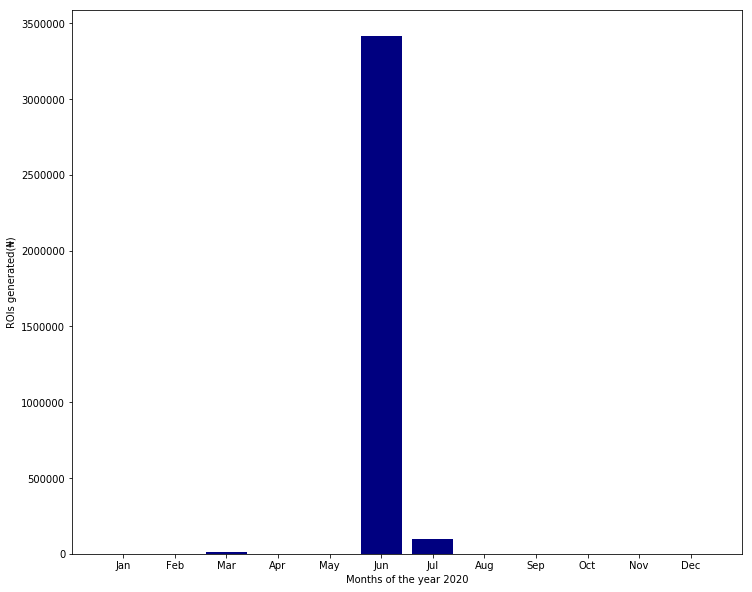

In [19]:
print("Here are a couple of things you can access:\n\n")
print("How many investors have I had? (Input 1)")
print("How much has been invested with me? (Input 2)")
print("How much ROI has been generated totally? (Input 3)")
print("Who is my biggest investor? (Input 4)")
print("Show me some information about amounts invested over the months (Input 5)")
print("Show me some information about the number of investors I've had over the months (Input 6)")
print("Show me some information about the ROIs generated over the months (Input 7)\n")
wb = opxl.load_workbook("files/Database.xlsx")
sheet = wb['Sheet1']
x = int(input())
print("\n")

def string_to_num(b):
    b = str(b)
    b = b.replace(',', '')
    return int(b)

df = pd.read_excel("files/Database.xlsx", skiprows=[x for x in range(0, 8)])
df["AMOUNT INVESTED(₦)"] = df["AMOUNT INVESTED(₦)"].apply(string_to_num)
df["ROI DUE(₦)"] = df["ROI DUE(₦)"].apply(string_to_num)
df["ROI + CAPITAL(₦)"] = df["ROI + CAPITAL(₦)"].apply(string_to_num)
capitals = np.array(df["AMOUNT INVESTED(₦)"])
rois = np.array(df["ROI DUE(₦)"])

if x == 5 or x == 6 or x == 7:
    year = input("What year do you want to check?  ").replace(' ', '')
    print("\n")
    
    def in_a_year(a):
        return a[-4:] == year
          
    a, b, c, d, e, f, g, h, i, j, k, l = ([], [], [], [], [], [], [], [], [], [], [], [])
    
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'Decemeber']

    lists = [a, b, c, d, e, f, g, h, i, j, k, l]
          
    

    new_df = df[df["TIME INVESTED"].apply(in_a_year)].reset_index().drop("index", axis = 1)

    m = 0
    for i in new_df["TIME INVESTED"]:
        for n, o in zip(months, lists):
            if n in i:
                o.append(new_df.loc[m]["AMOUNT INVESTED(₦)"])
        m+= 1


    
    a, b, c, d, e, f, g, h, i, j, k, l = ([], [], [], [], [], [], [], [], [], [], [], [])
    
    roilists = [a, b, c, d, e, f, g, h, i, j, k, l]
    roi_df = df[df["PAY DATE"].apply(in_a_year)].reset_index().drop("index", axis = 1)

    m = 0
    for i in new_df["PAY DATE"]:
        for n, o in zip(months, roilists):
            if n in i:
                o.append(new_df.loc[m]["ROI DUE(₦)"])
        m+= 1
        
        
        
if x == 1:
    print(f"You have had {sheet.cell(sheet.max_row, 1).value[3:]} investor(s)")
    
elif x == 2:
    print(f"{num2words(capitals.sum()).title()} Naira (₦{comma_separate(capitals.sum())})")

elif x == 3:
    print(f"{num2words(rois.sum()).title()} Naira (₦{comma_separate(rois.sum())})")
    
elif x == 4:
    a = list(capitals)
    index = a.index(max(a))
    print(f"{df.loc[index]['NAME']} with a capital of {num2words(a[index]).upper()} NAIRA (₦{comma_separate(a[index])})")

elif x == 5:      
    for n, o in zip(months, [np.sum(x) for x in lists]):
        print(f"₦{comma_separate(o)} was invested in {n}")

    plt.figure(figsize = (12,10))
    plt.bar([x[0:3] for x in months], [np.sum(x) for x in lists], color = (.5, 0, 0))
    plt.xlabel(f"Months of the year {year}")
    plt.ylabel("Amount invested(₦)") 
    #plt.title(f"Amount invested per month in the year {year}")

    plt.savefig("Investments_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")
          
elif x == 6:
    for n, o in zip(months, lists):
        print(f"{len(o)} investor(s) came in {n}")
    
    plt.figure(figsize = (12,10))
    plt.xlabel(f"Months of the year {year}")   
    plt.ylabel("Number of investors") 
    plt.bar([x[:3] for x in months], [len(x) for x in lists], color = (0, 0, 0))

    plt.savefig("Investors_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")
          
elif x == 7:
    for n, o in zip(months, [np.sum(x) for x in roilists]):
        print(f"₦{comma_separate(o)} was generated in {n}")

    plt.figure(figsize = (12,10))
    plt.bar([x[0:3] for x in months], [np.sum(x) for x in roilists], color = (0, 0, .5))
    plt.xlabel(f"Months of the year {year}")
    plt.ylabel("ROIs generated(₦)") 
    #plt.title(f"Amount generated per month in the year {year}")

    plt.savefig("ROI_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")

In [49]:
data = {'investor_detail': '+2347086643074, 150000'}

data['investor_detail'].split(', ')[0]

'+2347086643074'

In [1]:
a, b, c, d, e, f, g, h = ([], [], [], [], [], [], [], [])

In [3]:
type(a)

list

In [10]:
import openpyxl as opxl

In [24]:
file_content

{'source_file': <_io.BufferedReader name='files/MR. DANIEL BODAFI MOU.docx'>}

In [19]:
#Zamzar 

import requests
from requests.auth import HTTPBasicAuth

api_key = 'a9681b952523296ad0d37ccd5fe7bf42a51527be'
endpoint = "https://sandbox.zamzar.com/v1/jobs"

source_file = "files/MR. DANIEL BODAFI MOU.docx"
target_format = "pdf"

file_content = {'source_file': open(source_file, 'rb')}
data_content = {'target_format': target_format}
res = requests.post(endpoint, data=data_content, files=file_content, auth=HTTPBasicAuth(api_key, ''))
print(res.json())


job_id = 15
endpoint = "https://sandbox.zamzar.com/v1/jobs/{}".format(job_id)

resp = requests.get(endpoint, auth=HTTPBasicAuth(api_key, ''))


file_id = 3
local_filename = 'files/MR. DANIEL BODAFI MOU.pdf'
endpoint = "https://sandbox.zamzar.com/v1/files/{}/content".format(file_id)

response = requests.get(endpoint, stream=True, auth=HTTPBasicAuth(api_key, ''))

try:
    with open(local_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                f.flush()

    print("File downloaded")

except IOError:
    print("Error")

In [9]:
import convertapi
convertapi.api_secret = 'j4Yai85q2QIC94bk'
result = convertapi.convert('pdf', {'File': 'files/MR. DANIEL BODAFI MOU.docx'})
result.file.save('files/MR. DANIEL BODAFI MOU capi.pdf')

'files/MR. DANIEL BODAFI MOU capi.pdf'

In [28]:
dir("i")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [42]:
#export TWILIO_ACCOUNT_SID = 'ACbad3bf98ea7d52112b152e8d8222efb4'
#export TWILIO_AUTH_TOKEN = 'b8866b872d2950e651fadc1426463b5c'


from twilio.rest import Client
client = Client()()

fromm = 'whatsapp:+14155238886'
to = 'whatsapp:+2347086643074'

client.messages.create(body = "Hello. Your payment has been approved.", from_ = fromm, to = to)


TwilioException: Credentials are required to create a TwilioClient

In [ ]:
if os.path.isfile("files/approved_investor.json") and os.stat("files/approved_investor.json").st_size != 0:
    old_file = open("files/approved_investor.json", "r+")
    data = json.loads(old_file.read())
    data['investor_detail'] = input("The investor details please ")
else:
    old_file = open("files/approved_investor.json", "w+")
    data = {'investor_detail': '+2347086643074, 150000'}
    
old_file.seek(0)
old_file.write(json.dumps(data))


In [51]:
close("files/approved_investor.json")

NameError: name 'close' is not defined